# Frequent value imputation
is a technique used to handle missing values in categorical variables by replacing them with the most common or frequent value in the observed data. It involves identifying the category that appears most frequently in the variable and using that category to impute missing values. This is a simple and straightforward method that can be easily implemented, but it can lead to bias in the dataset if the missing values are not missing completely at random (MCAR).

Frequent value imputation is a simple and easy-to-implement method of handling missing values in categorical data. However, it is important to note that this method can lead to bias in the dataset if the missing values are not MCAR.

## Here are some of the disadvantages of frequent value imputation:

1. It can lead to bias in the dataset if the missing values are not MCAR.
2. It does not take into account the relationships between different categorical variables.
3. It can be difficult to determine the mode of a categorical variable with a large number of categories.
4. If you are concerned about the bias introduced by frequent value imputation, you may want to consider using a different imputation method, such as mean imputation or Bayesian imputation.

## Here are some of the advantages of frequent value imputation:

1. It is simple and easy to implement.
2. It does not require any special software.
3. It can be used with any categorical variable.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv", usecols = ["GarageQual", "FireplaceQu", "SalePrice"])

In [3]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [4]:
df.isnull().sum()

FireplaceQu    690
GarageQual      81
SalePrice        0
dtype: int64

Text(0, 0.5, 'Number of houses')

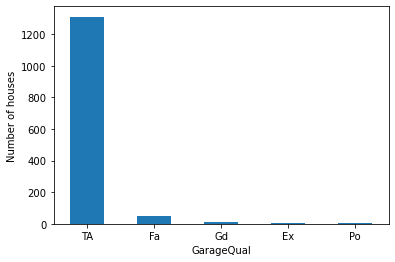

In [5]:
df["GarageQual"].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel("GarageQual")
plt.xticks(rotation=0)
plt.ylabel("Number of houses")

In [6]:
# CHecking the mode for Garage column
df["GarageQual"].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

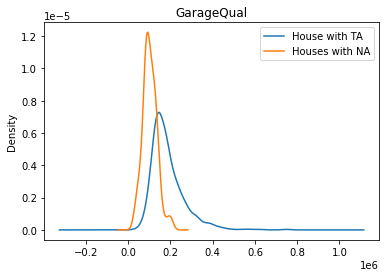

In [11]:
# Checking the distribution of with the mode and null values in garage column

fig = plt.figure()
ax = fig.add_subplot(111)

df[df["GarageQual"] == "TA"]["SalePrice"].plot(kind="kde", ax=ax)
df[df["GarageQual"].isnull()]["SalePrice"].plot(kind="kde", ax=ax)

lines, labels =ax.get_legend_handles_labels()
labels = ["House with TA", "Houses with NA"]
ax.legend(lines, labels, loc="best")

plt.title("GarageQual")

In [12]:
# storing the price for TA so that i can use it later
temp = df[df["GarageQual"] == "TA"]["SalePrice"]

In [13]:
df["GarageQual"].fillna("Ta", inplace=True)

<AxesSubplot:>

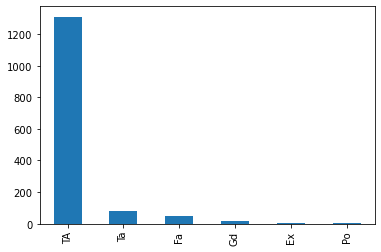

In [16]:
df["GarageQual"].value_counts().plot(kind="bar")

Text(0.5, 1.0, 'GarageQual')

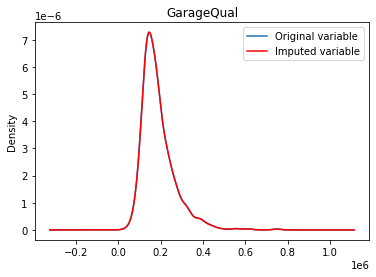

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)

# distribution of normal data
temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['GarageQual'] == 'TA']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

plt.title('The distribution before and after imputation is completely same')

# Working with the column which ahs 50% missing data

<AxesSubplot:>

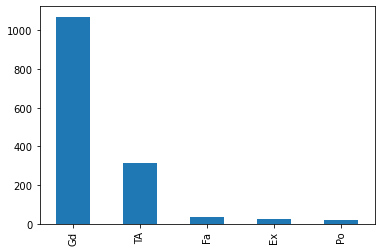

In [29]:
df['FireplaceQu'].value_counts().plot(kind='bar')

In [23]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

Text(0.5, 1.0, 'FireplaceQu')

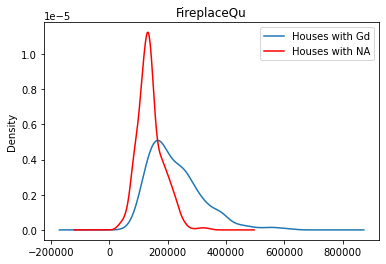

In [24]:
fig = plt.figure()
ax = fig.add_subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind='kde', ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc='best')

plt.title('FireplaceQu')

In [25]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [26]:
df['FireplaceQu'].fillna('Gd', inplace=True)

<AxesSubplot:>

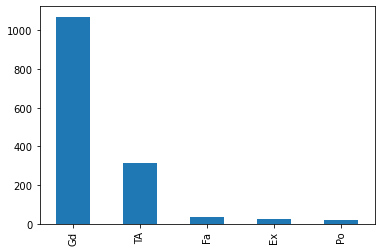

In [27]:
df['FireplaceQu'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'FireplaceQu')

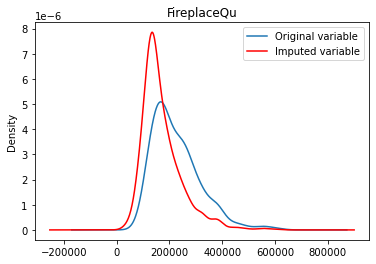

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)

# distribution of the noramal variable
temp.plot(kind='kde', ax=ax)

# distribution of the variable after imputation
df[df['FireplaceQu'] == 'Gd']['SalePrice'].plot(kind='kde', ax=ax, color='red')

lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')

# add title
plt.title('FireplaceQu')

##### You can analyze from the above graph that the distribtion on the coulum with 50% missing data after applying mode is not similar to the previous. The distribution has changed quite alot which is why in this situtaion replace the categorical data with mode is not the best fit option here

# Same above work using sklearn

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['SalePrice']),df['SalePrice'],test_size=0.2)

In [31]:
from sklearn.impute import SimpleImputer

In [32]:
imputer = SimpleImputer(strategy="most_frequent")

In [33]:
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [34]:
imputer.statistics_ (modes of both the columns) 

array(['Gd', 'TA'], dtype=object)